# Código para a segmentação de dados de um dataframe

O primeiro passo é importar os dados de um arquivo .csv

O exemplo usado para isso é o arquivo run8.csv, que possui dados emg medidos, além da alguns dados inerciais. 
Como, por enquanto, só nos interessa o valor EMG medido, ao se ler o csv, utiliza-se apenas as colunas do tempo de medição, que vai servir como índicie, e do emg medido. 

Utiliza-se uma frequência de 1000Hz para a coleta dos dados, o que fornece 1 amostra por milissegundo. O tempo total da coleta é feito por 21,6 segundos, totalizando 21600 medições. 

In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv

series = read_csv('run6.csv', header=32, usecols = [0,1], index_col = 0)
series.head()

,Avanti Sensor 1: EMG 1 [V]
X [s],
0.000,-0.000817
0.001,-0.004815
0.002,-0.008836
0.003,-0.010983
0.004,-0.010845


# Indexação dos dados

Ao ler o csv, o framework pandas já converte os dados em um DataFrame. Este DataFrame, como visto acima, utiliza como índice o tempo da medição (em ms) e a colunda de dados é a medição EMG (em Volts). 

Porém, as funções que vão ser usadas a seguir não entendem os valores do índice na forma que foram lidos, e por isso deve-se fazer uma conversão dos dados para que sejam entendidos

In [2]:
series.index = pd.to_datetime(series.index, unit = 's', origin= 'unix')
series.index = series.index.map(lambda t: t.replace(year=2021, month=10, day=12, hour=10))
series.index = pd.DatetimeIndex(series.index).to_period('L')
series.head()

,Avanti Sensor 1: EMG 1 [V]
X [s],
2021-10-12 10:00:00.000,-0.000817
2021-10-12 10:00:00.001,-0.004815
2021-10-12 10:00:00.002,-0.008836
2021-10-12 10:00:00.003,-0.010983
2021-10-12 10:00:00.004,-0.010845


# Segmentação dos Dados

$$
N\; janelas = \frac{tamanho\: dos\,dados - tamanho\, da\, janela}{incremento\, da\,janela} + 1
$$

In [3]:
# osw = series.rollling(window = 5, step = 2)
# series.rolling(window = 5).
data_size = len(series)
window_size = 250
window_overlap = 50

n_windows = (data_size - window_size)/window_overlap + 1

# osw = series.copy()
# osw2 = osw[1:5]
# osw2
# print(data_size, window_size, window_overlap, n_windows)
osw = []
for i in range(int(n_windows)):
    osw.append( series[(i*window_overlap):(i*window_overlap + window_size)])

osw[228]

,Avanti Sensor 1: EMG 1 [V]
X [s],
2021-10-12 10:00:11.400,-0.000021
2021-10-12 10:00:11.401,-0.000067
2021-10-12 10:00:11.402,-0.000091
2021-10-12 10:00:11.403,-0.000079
2021-10-12 10:00:11.404,-0.000062
...,...
2021-10-12 10:00:11.645,-0.000073
2021-10-12 10:00:11.646,-0.000072
2021-10-12 10:00:11.647,-0.000070


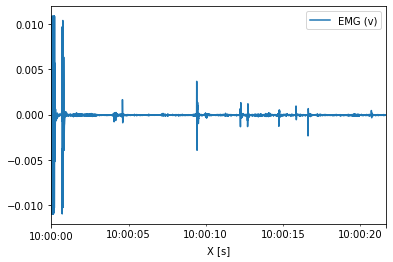

In [4]:
%matplotlib inline
from matplotlib import pyplot
series.plot()
pyplot.legend(['EMG (v)'])

In [ ]:
%lsmagic